<div style="color: black; font-family: serif">
    <h1><u>Are basketball positions predictable?</u></h1>
<h3>Project Proposal by DSCI-100 Group 26:</h3>
Andrew Wang,  Cassandra Zhang, James Magee, Ethan Yeung
</div>
<br><br>
<h5>Table of Contents</h5>

I. [Introduction](#introduction) <br>
II. [Methods](#methods) <br>
III. [Preliminary Data Analysis](#preliminary_data_analysis) <br>
&ensp; a. [Loading, Preparing, and Merging the data](#load_prep_merge) <br>
&ensp; b. [Splitting training and testing data](#test_train_split) <br>
&ensp; c. [Summarizing and Visualizing the training data](#visualize) <br>
IV. [Expected Results and Further Questions](#results) <br>

<br>

<h6>total markdown cell wordcount (excluding this cell): 515</h6>

<br><br><br>

# Introduction <a name="introduction"></a>

In National-Basketball-Association (NBA) regulation basketball, there are 5 players on the basketball-court at any given time; their positions are: Center (C), Power Forward (PF), Small Forward (SF), Shooting Guard (SG) and Point Guard (PG). Each of these positions requires different talents and physical traits for success at the professional level, and we hypothesize that these will predict the position of a player. Thus, this project seeks to answer the question: <b>can a player's performance statistics and physical characteristics accurately predict their position?</b> Possible uses for the classification model we create are discussed in the [Expected Results and Further Questions](#expected_results) section. Below is an image of the positions of basketball players on the court:
    
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Basketball_Positions.png" width="400" height="400" alt="image info" /><br>

<h6>found on Wikipedia, taken from:<br>
Bonsor, Kevin. How Basketball Works: Who's Who. HowStuffWorks. Retrieved on January 11, 2006.</h6>
<br>

The data we will be using comes from https://www.basketball-reference.com/, but we are using a scraped version of that data that we found on the website Kaggle: https://www.kaggle.com/datasets/drgilermo/nba-players-stats. From the scraped data, we will use two datasets: seasonal-gameplay-statistics, and player-physical-attributes.

<br><br>
# Methods <a name="methods"></a>

We will use the K-nearest-neighbors classification algorithm to train our model. Our predictors will come from two datasets: player physical data, and season gameplay statistics. We will select several counted (discrete) variables that we can divide by the minutes a player has played across their career to more evenly compare statistics between players. The gameplay columns we will use as predictors from the raw season-gameplay data are:

<b>
BLK=Blocks<br>
AST=Assists<br>
TRB=Total-Rebounds<br>
STL=Steals<br>
3PA=3-Point-Attempts<br>
</b><br>

From the player physical data, we will include <b>height and weight</b>.

We visualize the distributions of our predictor variables in the [Summarizing and Visualizing the training data](#visualize) section, and in our complete project we will plot the accuracy of our model against K (the number of neighbors used to determine class.)

<br><br><br>
# Preliminary Data Analysis <a name="preliminary_data_analysis">

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library (readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

<br>


### Loading, Preparing, and Merging the data <a name="load_prep_merge"/>

We will need to merge two datasets: seasonal gameplay statistics for all players in the NBA, and NBA players' physical attributes. We will load and tidy each dataset separately, then merge.

### Loading season data <a name="reading_the_season_data">


In [2]:
urlfile_1 <- "https://raw.githubusercontent.com/cass12345/ddssccii/main/Seasons_Stats.csv"
raw_season_data <- read_csv(url(urlfile_1))
slice(raw_season_data, 1:10)

New names:
• `` -> `...1`
Rows: 24691 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Player, Pos, Tm
dbl (48): ...1, Year, Age, G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%,...
lgl  (2): blanl, blank2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1950,Curly Armstrong,G-F,31,FTW,63,NA,NA,NA,⋯,0.705,NA,NA,NA,176,NA,NA,NA,217,458
1,1950,Cliff Barker,SG,29,INO,49,NA,NA,NA,⋯,0.708,NA,NA,NA,109,NA,NA,NA,99,279
2,1950,Leo Barnhorst,SF,25,CHS,67,NA,NA,NA,⋯,0.698,NA,NA,NA,140,NA,NA,NA,192,438
3,1950,Ed Bartels,F,24,TOT,15,NA,NA,NA,⋯,0.559,NA,NA,NA,20,NA,NA,NA,29,63
4,1950,Ed Bartels,F,24,DNN,13,NA,NA,NA,⋯,0.548,NA,NA,NA,20,NA,NA,NA,27,59
5,1950,Ed Bartels,F,24,NYK,2,NA,NA,NA,⋯,0.667,NA,NA,NA,0,NA,NA,NA,2,4
6,1950,Ralph Beard,G,22,INO,60,NA,NA,NA,⋯,0.762,NA,NA,NA,233,NA,NA,NA,132,895
7,1950,Gene Berce,G-F,23,TRI,3,NA,NA,NA,⋯,0.000,NA,NA,NA,2,NA,NA,NA,6,10
8,1950,Charlie Black,F-C,28,TOT,65,NA,NA,NA,⋯,0.651,NA,NA,NA,163,NA,NA,NA,273,661


In [3]:
cat("ALL COLUMNS IN RAW DATAFRAME:\n", colnames(raw_season_data), sep="\t")

ALL COLUMNS IN RAW DATAFRAME:
	...1	Year	Player	Pos	Age	Tm	G	GS	MP	PER	TS%	3PAr	FTr	ORB%	DRB%	TRB%	AST%	STL%	BLK%	TOV%	USG%	blanl	OWS	DWS	WS	WS/48	blank2	OBPM	DBPM	BPM	VORP	FG	FGA	FG%	3P	3PA	3P%	2P	2PA	2P%	eFG%	FT	FTA	FT%	ORB	DRB	TRB	AST	STL	BLK	TOV	PF	PTS

<br>

### Wrangling the season data

In [4]:
season_data <- raw_season_data |>
    filter(Year >= 2000) |>
    filter(Pos %in% c("PF","PG","SF","SG","C")) |>
    filter(MP != 0) |>
    select(Year, Player, Pos, BLK, AST, TRB, STL, MP, "3PA", PF) |>
    rename(name = Player) |>
    rename(three_PA = "3PA")|>
    mutate(pos = as_factor(Pos)) |>
    group_by(name, pos) |>
    summarize(across(.cols  = c(BLK, AST, TRB, STL, MP, three_PA, PF), 
                     .fns   = list(sum=sum),
                     .names = "{.col}")) |>
    mutate(across(.cols  = c(BLK, AST, TRB, STL, three_PA, PF),
                  .fns   = list(function(.){return(./MP)}),
                  .names = "{.col}_per_MP"),
          .keep = "unused")

head(season_data)

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.C. Green,PF,0.007784431,0.03562874,0.23922156,0.024850299,0.002994012,0.07365269
A.J. Bramlett,C,0.000000000,0.00000000,0.36065574,0.016393443,0.000000000,0.21311475
A.J. Guyton,PG,0.009630819,0.11797753,0.06420546,0.016051364,0.154895666,0.04654896
A.J. Hammons,C,0.079754601,0.02453988,0.22085890,0.006134969,0.061349693,0.12883436
A.J. Price,SG,0.000000000,0.13131313,0.10101010,0.010101010,0.222222222,0.05050505
A.J. Price,PG,0.002166586,0.14443909,0.09605200,0.031535869,0.174530573,0.05946076


<br>

### Loading the player data

In [5]:
urlfile_2 <- "https://raw.githubusercontent.com/cass12345/ddssccii/main/player_data.csv"
raw_player_data <- read_csv(url(urlfile_2))
head(raw_player_data)

Rows: 4550 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): name, position, height, birth_date, college
dbl (3): year_start, year_end, weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,year_start,year_end,position,height,weight,birth_date,college
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles"
Mahmoud Abdul-Rauf,1991,2001,G,6-1,162,"March 9, 1969",Louisiana State University
Tariq Abdul-Wahad,1998,2003,F,6-6,223,"November 3, 1974",San Jose State University
Shareef Abdur-Rahim,1997,2008,F,6-9,225,"December 11, 1976",University of California


<br>

### Wrangling the player data

In [6]:
player_data <- raw_player_data |>
    select(name, height, weight) |>
    separate(col  = height,
             into = c("feet","inches"),
             sep  = "-",
             convert = TRUE)|>
    mutate(height = feet*12+inches) |>
    select(name, weight, height)

head(player_data)

name,weight,height
<chr>,<dbl>,<dbl>
Alaa Abdelnaby,240,82
Zaid Abdul-Aziz,235,81
Kareem Abdul-Jabbar,225,86
Mahmoud Abdul-Rauf,162,73
Tariq Abdul-Wahad,223,78
Shareef Abdur-Rahim,225,81


<br>

### Merging the Dataframes

In [7]:
combined_data <- merge(x = season_data, y = player_data, by.x = "name", by.y = "name") |>
    drop_na()

head(combined_data)

,name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP,weight,height
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A.C. Green,PF,0.007784431,0.03562874,0.23922156,0.024850299,0.002994012,0.07365269,220,81
2,A.J. Bramlett,C,0.000000000,0.00000000,0.36065574,0.016393443,0.000000000,0.21311475,227,82
3,A.J. Guyton,PG,0.009630819,0.11797753,0.06420546,0.016051364,0.154895666,0.04654896,180,73
4,A.J. Hammons,C,0.079754601,0.02453988,0.22085890,0.006134969,0.061349693,0.12883436,260,84
5,A.J. Price,SG,0.000000000,0.13131313,0.10101010,0.010101010,0.222222222,0.05050505,181,74
6,A.J. Price,PG,0.002166586,0.14443909,0.09605200,0.031535869,0.174530573,0.05946076,181,74


<br><br>

### Splitting training and testing data <a name="test_train_split">

3/4 of the data will be used for training our classification model, and 1/4 will be used for testing.

In [8]:
# get the training data
data_split <- initial_split(combined_data, prop = 0.75, strata = pos)
player_train <- training(data_split)
player_test <- testing(data_split)

head(player_train)

,name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP,weight,height
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,A.J. Bramlett,C,0.000000000,0.00000000,0.3606557,0.016393443,0.000000e+00,0.2131148,227,82
4,A.J. Hammons,C,0.079754601,0.02453988,0.2208589,0.006134969,6.134969e-02,0.1288344,260,84
17,Aaron Williams,C,0.032335109,0.04188866,0.2145875,0.021495499,7.348888e-04,0.1567150,220,81
21,Adam Keefe,C,0.021523179,0.05629139,0.2251656,0.028145695,1.655629e-03,0.1490066,230,81
24,Adonal Foyle,C,0.093317584,0.02640904,0.2623186,0.019912251,8.437395e-05,0.1177860,250,82
30,Al Harrington,C,0.007362495,0.06149848,0.2018190,0.033780858,1.896925e-01,0.1229970,230,81


<br><br>

### Summarizing and Visualizing the training data <a name="visualize">
 

In [9]:
#count total missing values in each column (we already filtered for null values)
sapply(player_train, function(x) sum(is.na(x)))

name             pos      BLK_per_MP      AST_per_MP      TRB_per_MP 
              0               0               0               0               0 
     STL_per_MP three_PA_per_MP       PF_per_MP          weight          height 
              0               0               0               0               0

**1741 rows and 9 columns in total---indicator of sufficient data used, and no missing values**

In [10]:
# display rows and columns
cat("rows   : ", nrow(player_train), "\n")
cat("columns: ", ncol(player_train))

rows   :  1741 
columns:  10


**the min, median, mean, max are shown for each column**


In [11]:
player_train |>
    select(!name) |>
    summary()

 pos        BLK_per_MP         AST_per_MP        TRB_per_MP    
 SG:387   Min.   :0.000000   Min.   :0.00000   Min.   :0.0000  
 SF:353   1st Qu.:0.005823   1st Qu.:0.03846   1st Qu.:0.1104  
 PG:305   Median :0.013158   Median :0.05864   Median :0.1579  
 C :327   Mean   :0.020716   Mean   :0.07313   Mean   :0.1735  
 PF:369   3rd Qu.:0.028201   3rd Qu.:0.09491   3rd Qu.:0.2316  
          Max.   :0.500000   Max.   :0.36842   Max.   :1.5000  
   STL_per_MP      three_PA_per_MP      PF_per_MP           weight     
 Min.   :0.00000   Min.   :0.000000   Min.   :0.00000   Min.   :135.0  
 1st Qu.:0.02140   1st Qu.:0.003024   1st Qu.:0.07457   1st Qu.:200.0  
 Median :0.02903   Median :0.056718   Median :0.09615   Median :220.0  
 Mean   :0.03027   Mean   :0.068496   Mean   :0.10351   Mean   :219.9  
 3rd Qu.:0.03712   3rd Qu.:0.117397   3rd Qu.:0.12458   3rd Qu.:240.0  
 Max.   :0.25000   Max.   :1.000000   Max.   :0.66667   Max.   :360.0  
     height     
 Min.   :63.00  
 1st Qu.:77.00

<br><br><br><br>



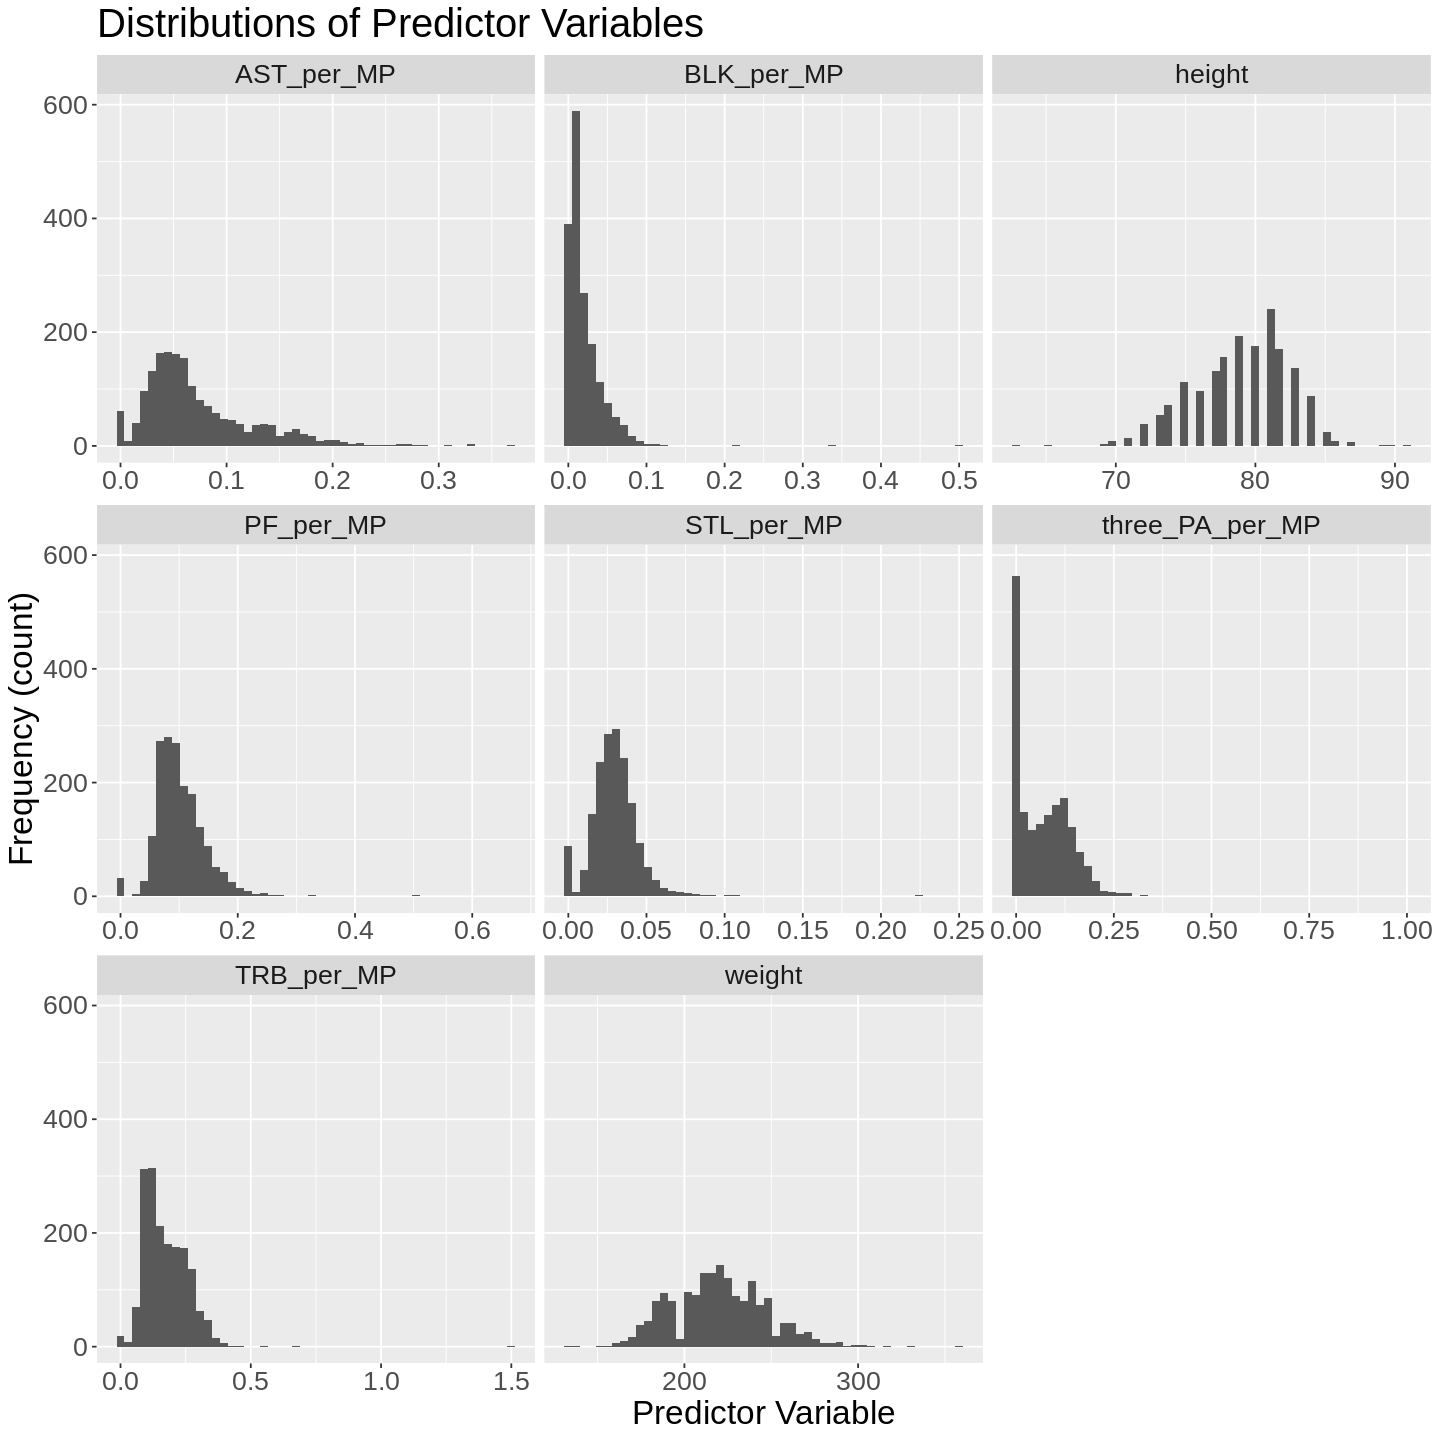

In [12]:
options(repr.plot.width = 12, repr.plot.height = 12)

predictor_distributions <- player_train |>
    select(!name & !pos) |>
    gather() |>
    ggplot(aes(value)) + 
    geom_histogram(bins = 50) + 
    facet_wrap(~key, scales = 'free_x') +
    labs(x = "Predictor Variable", y = "Frequency (count)", title = "Distributions of Predictor Variables") +
    theme(text=element_text(size=20))

predictor_distributions

<br><br>

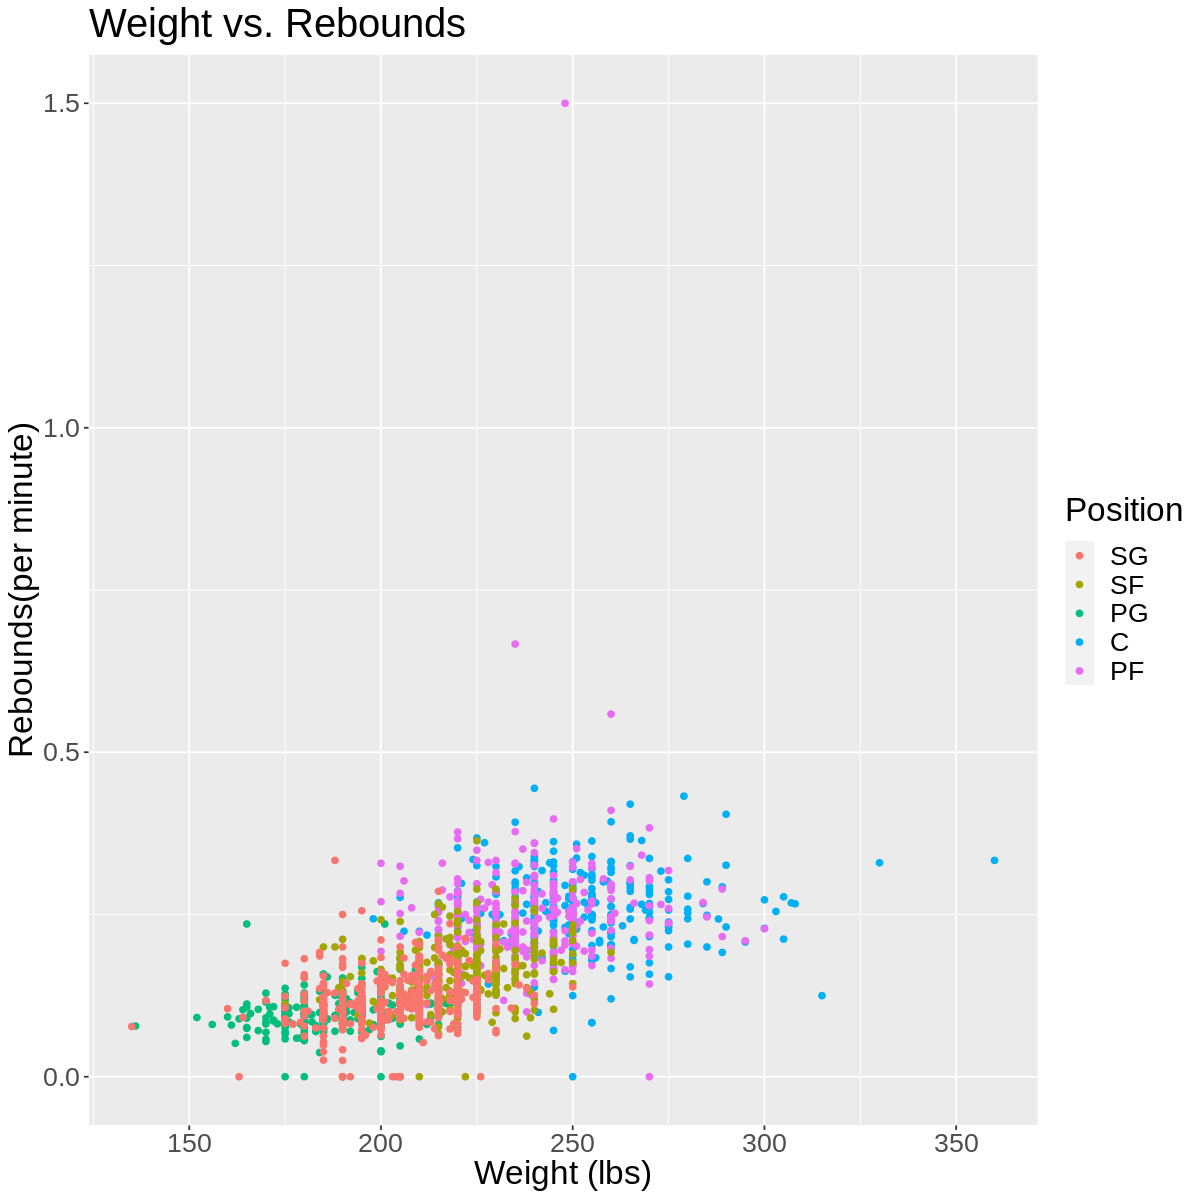

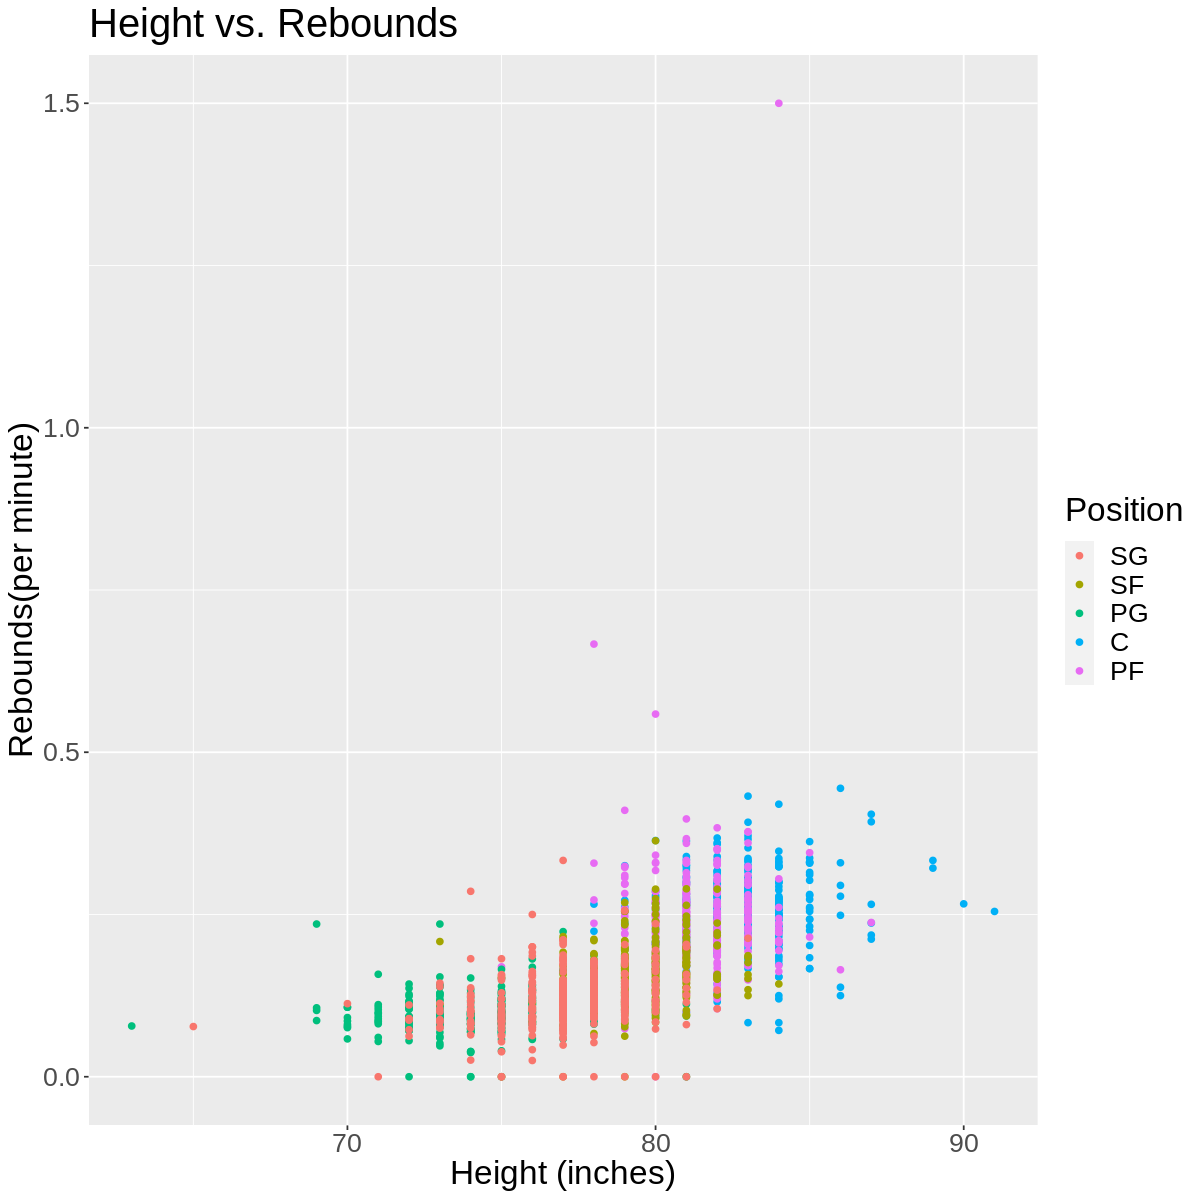

In [13]:
options(repr.plot.width = 10, repr.plot.height = 10)

wt_vs_rebounds <- player_train  |>  
    ggplot(aes(x= weight, 
               y= TRB_per_MP, 
               color=pos
               )) +
    geom_point() +
    labs(x = "Weight (lbs)", 
         y = "Rebounds(per minute)", 
         title = "Weight vs. Rebounds",
         color = "Position") + 
    theme(text=element_text(size=20))
        
ht_vs_rebounds <- player_train  |>  
    ggplot(aes(x = height, 
               y = TRB_per_MP, 
               color = pos
               )) +
    geom_point() +
    labs(x = "Height (inches)", 
         y = "Rebounds(per minute)", 
         title = "Height vs. Rebounds",
         color = "Position") + 
    theme(text=element_text(size=20))

wt_vs_rebounds
ht_vs_rebounds

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



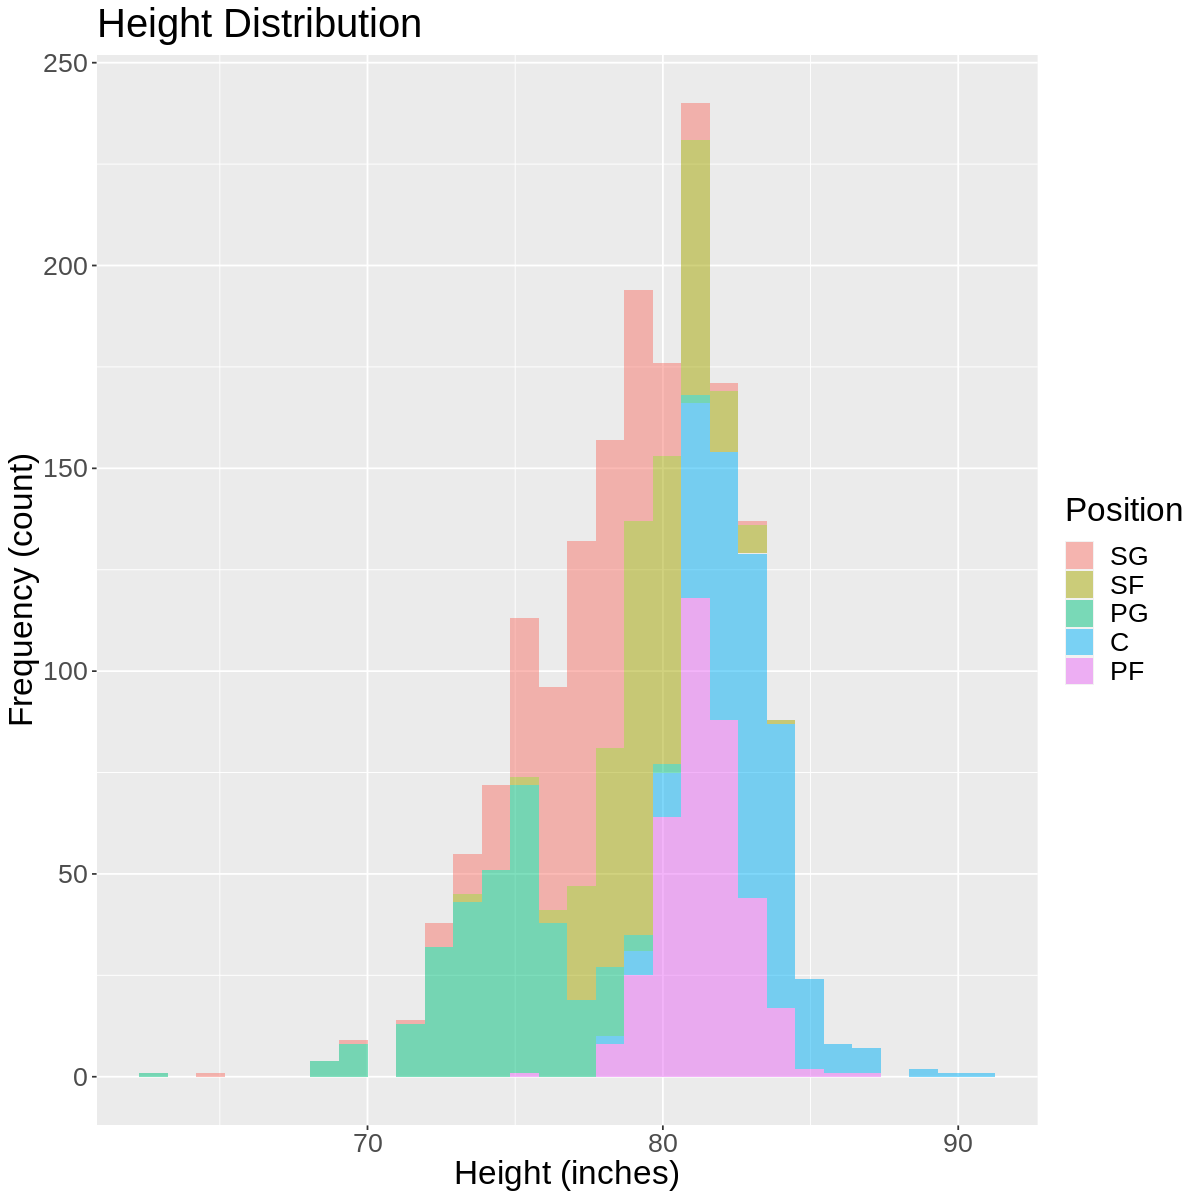

In [14]:
height_dist_by_pos <- ggplot(player_train, aes(x = height, fill = pos)) + 
    geom_histogram(alpha = 0.5) +
    labs(x = "Height (inches)", y = "Frequency (count)", title="Height Distribution", fill = "Position") + 
    theme(text=element_text(size=20))
height_dist_by_pos

# Expected Results and Further Questions <a name="results">

Based on the plot above, height may be a good predictor of position, at least for separating betwen point guards and centers. (their distributions above have little overlap.) We suspect our model will be most inaccurate in differentiating between positions that have similar goals.

Our final project will likely lead to other questions, especially involving causation. For example: is it players' talent and skill determine their gameplay statistics, and in turn determine their position, or is it their position that forces them to focus on particular skills which overtime result in their gameplay statistics?

<h2><span style="color: red">PROJECT REPORT</span></h2>

In [15]:
head(player_train)

,name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP,weight,height
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,A.J. Bramlett,C,0.000000000,0.00000000,0.3606557,0.016393443,0.000000e+00,0.2131148,227,82
4,A.J. Hammons,C,0.079754601,0.02453988,0.2208589,0.006134969,6.134969e-02,0.1288344,260,84
17,Aaron Williams,C,0.032335109,0.04188866,0.2145875,0.021495499,7.348888e-04,0.1567150,220,81
21,Adam Keefe,C,0.021523179,0.05629139,0.2251656,0.028145695,1.655629e-03,0.1490066,230,81
24,Adonal Foyle,C,0.093317584,0.02640904,0.2623186,0.019912251,8.437395e-05,0.1177860,250,82
30,Al Harrington,C,0.007362495,0.06149848,0.2018190,0.033780858,1.896925e-01,0.1229970,230,81


In [16]:
seq(from = 1, to = 10, by = 2)

[1] 1 3 5 7 9

FROM THIS ON = useless

In [17]:
library(tidymodels)

In [29]:
#  set.seed(1234)
# #everything, original
#  test_data <- player_train

 # bball_recipe <- recipe(pos ~ BLK_per_MP + AST_per_MP + TRB_per_MP + STL_per_MP + three_PA_per_MP + weight + height, 
 #                        data = test_data) |>
 #     step_center(all_predictors()) |>
 #     step_scale(all_predictors())


# k_vals <- tibble(neighbors = seq(from = 50, to = 100, by = 10))

# bball_vfold <- vfold_cv(test_data, v = 5, strata = pos)

# bball_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
#     set_engine("kknn") |>
#     set_mode("classification")

# bball_fit <- workflow() |>
#     add_recipe(bball_recipe) |>
#     add_model(bball_spec) |>
#     tune_grid(resamples = bball_vfold, grid = k_vals) |>
#     collect_metrics()

# bball_fit



In [19]:
# set.seed(1234)
# #everything add personal foul 
# test_data <- player_train

# ball_recipe <- recipe(pos ~ BLK_per_MP + AST_per_MP + TRB_per_MP + STL_per_MP + three_PA_per_MP + PF_per_MP + weight + height, 
#                        data = test_data) |>
#     step_center(all_predictors()) |>
#     step_scale(all_predictors())


# ks <- tibble(neighbors = seq(from = 50, to = 100, by = 10))

# ball_vfold1 <- vfold_cv(test_data, v = 5, strata = pos)

# ball_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
#     set_engine("kknn") |>
#     set_mode("classification")

# ball_fit <- workflow() |>
#     add_recipe(ball_recipe) |>
#     add_model(ball_spec) |>
#     tune_grid(resamples = ball_vfold1, grid = ks) |>
#     collect_metrics()

# ball_fit

In [20]:
# set.seed(1234)
# #everything except assist
# test_data <- player_train

# ball_recipe1 <- recipe(pos ~ BLK_per_MP + STL_per_MP + TRB_per_MP + three_PA_per_MP + weight + height, 
#                        data = test_data) |>
#     step_center(all_predictors()) |>
#     step_scale(all_predictors())


# ks <- tibble(neighbors = seq(from = 50, to = 100, by = 10))

# ball_vfold1 <- vfold_cv(test_data, v = 5, strata = pos)

# ball_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
#     set_engine("kknn") |>
#     set_mode("classification")

# ball_fit2 <- workflow() |>
#     add_recipe(ball_recipe1) |>
#     add_model(ball_spec1) |>
#     tune_grid(resamples = ball_vfold1, grid = ks) |>
#     collect_metrics()

# ball_fit2

In [21]:
# bball_fit |>
#     filter(.metric == "accuracy") |>
#     filter(mean == max(mean))

In [22]:
# bball_fit |>
#     filter(.metric == "accuracy") |>
#     select(neighbors, mean) |>
#     ggplot(aes(x = neighbors, y = mean)) +
#     geom_point() +
#     geom_line()

In [23]:
# ball_fit |>
#     filter(.metric == "accuracy") |>
#     filter(mean == max(mean))

In [24]:
# ball_fit |>
#     filter(.metric == "accuracy") |>
#     select(neighbors, mean) |>
#     ggplot(aes(x = neighbors, y = mean)) +
#     geom_point() +
#     geom_line()

In [25]:
set.seed(1234)
#everything except steals
# test_data <- player_train

ball_recipe1 <- recipe(pos ~ BLK_per_MP + AST_per_MP + TRB_per_MP + three_PA_per_MP + weight + height, 
                       data = player_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())


ks <- tibble(neighbors = seq(from = 80, to = 100, by = 1))

ball_vfold1 <- vfold_cv(player_train, v = 5, strata = pos)

ball_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

ball_fit1 <- workflow() |>
    add_recipe(ball_recipe1) |>
    add_model(ball_spec1) |>
    tune_grid(resamples = ball_vfold1, grid = ks) |>
    collect_metrics()

ball_fit1

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
80,accuracy,multiclass,0.6444599,5,0.003260217,Preprocessor1_Model01
80,roc_auc,hand_till,0.9084347,5,0.002945805,Preprocessor1_Model01
81,accuracy,multiclass,0.6421676,5,0.003732411,Preprocessor1_Model02
81,roc_auc,hand_till,0.9082736,5,0.002981907,Preprocessor1_Model02
82,accuracy,multiclass,0.6444583,5,0.003428368,Preprocessor1_Model03
82,roc_auc,hand_till,0.9080791,5,0.002932747,Preprocessor1_Model03
83,accuracy,multiclass,0.6427242,5,0.003825857,Preprocessor1_Model04
83,roc_auc,hand_till,0.9080318,5,0.002997256,Preprocessor1_Model04
84,accuracy,multiclass,0.6415814,5,0.003663110,Preprocessor1_Model05


In [26]:
ball_fit1 |>
    filter(.metric == "accuracy") |>
    filter(mean == max(mean))

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
80,accuracy,multiclass,0.6444599,5,0.003260217,Preprocessor1_Model01


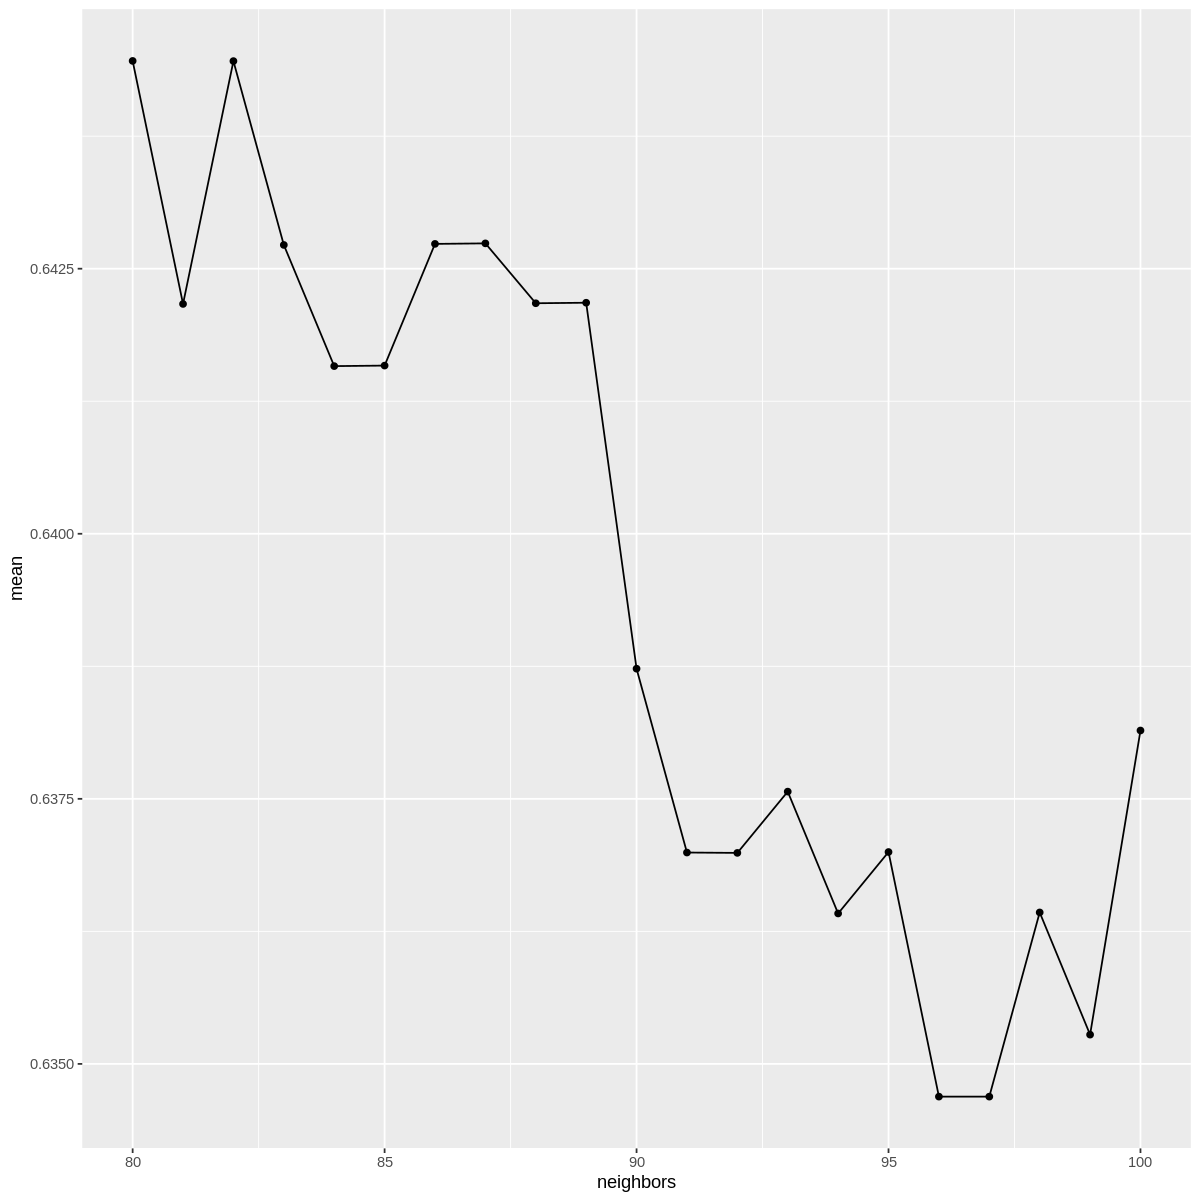

In [27]:
ball_fit1 |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line()

In [31]:
knn_superb_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 90) |>
set_engine("kknn") |>
set_mode("classification") 
knn_superb_spec

bball_fit <- workflow () |>
add_recipe(ball_recipe1) |>
add_model(knn_superb_spec) |>
fit(data = player_test)
bball_fit

bball_predictions <- predict(bball_fit, player_test) |>
bind_cols(player_test)
bball_predictions

bball_accuracy <- bball_predictions |>
metrics(truth = pos, estimate = .pred_class) |>
select(.metric, .estimate)
bball_accuracy

bball_confusion_mat <- bball_predictions |>
conf_mat(truth = pos, estimate = .pred_class) 
bball_confusion_mat

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 90
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(90,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3996569
Best kernel: rectangular
Best k: 90

.pred_class,name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP,weight,height
<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PG,A.J. Guyton,PG,0.009630819,0.11797753,0.06420546,0.01605136,0.1548956661,0.04654896,180,73
C,Aaron Gray,C,0.023466903,0.05556785,0.31148993,0.02501660,0.0008855435,0.17622316,270,84
SG,Aaron McKie,SG,0.008219178,0.12963230,0.13280461,0.04585436,0.0693583273,0.08103821,209,77
PG,Acie Law,PG,0.001494768,0.12526158,0.08221226,0.03766816,0.0499252616,0.08071749,195,75
SG,Adonis Thomas,SF,0.000000000,0.08108108,0.08108108,0.00000000,0.1351351351,0.16216216,200,79
SF,Al Thornton,PF,0.018608414,0.04409385,0.16788026,0.02144013,0.0529935275,0.09506472,220,80
SF,Al Thornton,SF,0.017891131,0.04238041,0.14109885,0.02245908,0.0210633168,0.09415049,220,80
SF,Alan Anderson,SG,0.002737226,0.05383212,0.11998175,0.03056569,0.1218065693,0.09397810,220,78
C,Alan Williams,C,0.045197740,0.03248588,0.41242938,0.03813559,0.0014124294,0.17655367,260,80


.metric,.estimate
<chr>,<dbl>
accuracy,0.6243568
kap,0.5299339


          Truth
Prediction SG SF PG  C PF
        SG 81 17 29  0  3
        SF 25 79  1  0 35
        PG 22  1 71  0  0
        C   0  3  0 85 38
        PF  2 18  1 24 48

In [ ]:
# ball_fit2 |>
#     filter(.metric == "accuracy") |>
#     filter(mean == max(mean))

In [ ]:
# ball_fit2 |>
#     filter(.metric == "accuracy") |>
#     select(neighbors, mean) |>
#     ggplot(aes(x = neighbors, y = mean)) +
#     geom_point() +
#     geom_line()

In [ ]:
#k_plot

1. Introduction
* Predictor Selection Hypothesis (why we choose the positions that we do)
2. Data Wrangling:
* Explain how we combine all the rows (player and position)
* Explainging why we divide by minutes played (MP)
2. Oversampling (https://datasciencebook.ca/classification1.html#balancing)
3. Adding / Taking away predictors
* forward selection 